**Autora: Leidiane Teixeira dos Reis**

Esse projeto tem como objetivo utilizar rede neurais multilayer perceptron para regressão e regressão linear para prever a autonomia de veículos a partir do seu peso.

**DADOS**:
Os dados estão diponíveis na plataforma kaggle : [autompg-dataset](https://www.kaggle.com/uciml/autompg-dataset)


##Preâmbulo

In [40]:
#Importação das bibliotecas básicas
import pandas as pd
import numpy as np

In [41]:
#Geração de gráficos
import matplotlib.pyplot as plt

In [42]:
#Bibliotecas específicas para machine learning
from sklearn.preprocessing import StandardScaler               #normalização
from sklearn.model_selection import train_test_split           #divisão conjuntos de treino e teste
from sklearn.metrics import r2_score                           #avaliação da precisão do modelo
from sklearn.linear_model import SGDRegressor                  #modelo linear
from sklearn.neural_network import MLPRegressor                #modelo MLP para regressão  

## Conjunto de dados (Dataset)

**Importante**: Para executar o camando abaixo lembre-se de fazer o download do conjunto de dados e  coloque o caminho do seu próprio drive ou máquina. Caso contrário dará erro.

In [43]:
#Carregamento do conjunto de dados do drive
dados = pd.read_csv('/content/drive/MyDrive/PYTHON - MACHINE LEARNING - DATA SCIENCE/CÓDIGOS MACHINE LEARNING /MLP/auto-mpg.csv')

In [44]:
dados.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Vamos visualizar a relação entre as duas variáveis que desejamos correlacionar. 

Text(0.5, 1.0, 'Relação entre autonomia e peso dos veículos')

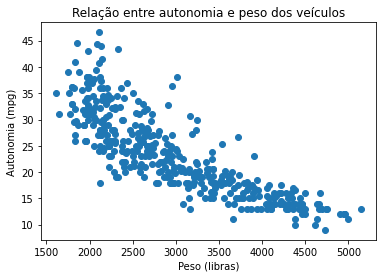

In [97]:
plt.scatter(dados[['weight']], dados[['mpg']])
plt.xlabel('Peso (libras)')
plt.ylabel('Autonomia (mpg)')
plt.title('Relação entre autonomia e peso dos veículos')

Existe uma tendência: a medida que o peso do veículo aumenta a autonomia dimunui.

##Pré-processamento

Começamos pela seleção das variáveis de entrada e saída do modelo, armazenadas nas váriaveis X e Y respectivamente.<br>
entrada(s): weight (peso) <br>
saída: autonomia em milhas por galão (mpg)

In [98]:
X = dados[['weight']]
Y = dados[['mpg']]

Vamos transformar as variáveis peso(weight) de libras para KG e a autonomia de MPG para KM/L 

In [ ]:
X['weight'] = X['weight'] * 0.453592
Y['mpg'] = Y['mpg'] * 0.425144

In [ ]:
X

In [100]:
#Resumo estatístico dos dados de entrada
X.describe()

,weight
count,398.000000
mean,1347.360846
std,384.120654
min,731.643896
25%,1008.675210
50%,1271.645172
75%,1636.559936
max,2331.462880


Normalizamos os dados para um intervalo de valores menor para facilitar o treinamento. E para isso utilizamos a função de pre-processing do sklearn

In [101]:
#Normalização dos dados de entrada
escala = StandardScaler()
escala.fit(X)

X_norm = escala.transform(X)

Dividimos o dataset em conjunto de treino e teste por meio da função train_test_split. Serão usados 70% dos dados para treino e 30% para validação.

In [102]:
X_norm_train, X_norm_test, Y_train, Y_test = train_test_split(X_norm, Y, test_size=0.3)

##Processamento

Nessa fase, treinaremos nosso modelo. Primeiro criamos um objeto da função MLPRegressor passando as variáveis os hiperparâmetros necessárias para o treinamento do modelo, sendo elas:
* *hidden_layer_sizes=(10,5)* : número de neurônio e camadas escondidas
* *max_iter* : número máximo de iterações
* *tol* : tolerância para otimização
* *learning_rate_init* : taxa de aprendizagem inicial
* *solver* : solucionador para otimização de pesos
* *activation* : função de ativação
* *learning_rate*: taxa de aprendizagem
* *verbose*: mostra o que está acontecendo a cada iteração

In [103]:
rna = MLPRegressor(hidden_layer_sizes=(20,10),
                   max_iter= 2000,
                   tol = 0.0000001,
                   learning_rate_init =0.1,
                   solver = 'sgd',
                   activation = 'logistic',
                   learning_rate= 'constant',
                   verbose = 2)

E treinamos nosso modelo utilizando redes neurais MLP

In [104]:
#Treinamento usando RNA MLP
rna.fit(X_norm_train, Y_train)

Iteration 1, loss = 41.69346543
Iteration 2, loss = 14.77194953
Iteration 3, loss = 5.30690919
Iteration 4, loss = 5.00750545
Iteration 5, loss = 4.50826516
Iteration 6, loss = 3.53671711
Iteration 7, loss = 2.41693683
Iteration 8, loss = 1.77208080
Iteration 9, loss = 1.69486741
Iteration 10, loss = 1.86045487
Iteration 11, loss = 1.86993754
Iteration 12, loss = 2.06562578
Iteration 13, loss = 1.90903525
Iteration 14, loss = 1.66808364
Iteration 15, loss = 1.71989006
Iteration 16, loss = 1.75587819
Iteration 17, loss = 1.75398917
Iteration 18, loss = 1.69805796
Iteration 19, loss = 1.69479100
Iteration 20, loss = 1.75038513
Iteration 21, loss = 1.67134076
Iteration 22, loss = 1.68388962
Iteration 23, loss = 1.65626467
Iteration 24, loss = 1.64914081
Iteration 25, loss = 1.66013195
Iteration 26, loss = 1.64655639
Iteration 27, loss = 1.68592502
Iteration 28, loss = 1.77260966
Iteration 29, loss = 1.63076781
Iteration 30, loss = 1.62708616
Iteration 31, loss = 1.64737611
Iteration 32, l

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(20, 10), learning_rate='constant',
             learning_rate_init=0.1, max_fun=15000, max_iter=2000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='sgd', tol=1e-07,
             validation_fraction=0.1, verbose=2, warm_start=False)

Criamos o objeto do nosso segundo modelo passando alguns hiperparâmetros.

In [105]:
#Treinamento usando regressão linear
reglinear = SGDRegressor(max_iter=2000,
                        tol = 000000.1,
                        eta0 = 0.1,
                        learning_rate = 'constant',
                        verbose = 2,)

In [106]:
#Treinamos o modelo usando regressão linear
reglinear.fit(X_norm_train, Y_train)

-- Epoch 1
Norm: 2.65, NNZs: 1, Bias: 9.264373, T: 278, Avg. loss: 3.044495
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 3.35, NNZs: 1, Bias: 10.354374, T: 556, Avg. loss: 1.975077
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2.64, NNZs: 1, Bias: 9.131039, T: 834, Avg. loss: 1.934656
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 2.38, NNZs: 1, Bias: 10.550907, T: 1112, Avg. loss: 1.950503
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 2.60, NNZs: 1, Bias: 9.349041, T: 1390, Avg. loss: 1.888554
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 2.67, NNZs: 1, Bias: 9.546080, T: 1668, Avg. loss: 1.959946
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 2.81, NNZs: 1, Bias: 9.397776, T: 1946, Avg. loss: 1.889016
Total training time: 0.00 seconds.
Convergence after 7 epochs took 0.00 seconds


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=2000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.1, validation_fraction=0.1, verbose=2,
             warm_start=False)

##Pós-processamento

Agora que treinamos o nosso modelo e temos os parâmetros podemos fazer as previsões e validar nossos modelos

In [107]:
#Previsões no conjunto de teste
Y_rna_previsao = rna.predict(X_norm_test)
Y_rl_previsao = reglinear.predict(X_norm_test)

In [108]:
#Calculo da próximidade entre os dados reais e previstos (R^2)
r2_rna = r2_score(Y_test, Y_rna_previsao)
r2_rl = r2_score(Y_test, Y_rl_previsao)

print('R² do MLP: ',r2_rna)
print('R² da RL: ', r2_rl)

R² do MLP:  0.7185863320994899
R² da RL:  0.6585444074000677


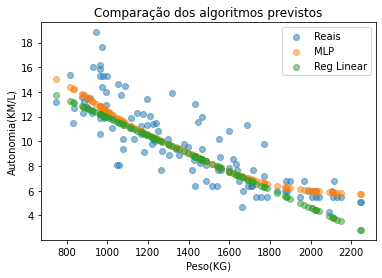

In [110]:
#Visualização dos resultados
X_test = escala.inverse_transform(X_norm_test)

plt.scatter(X_test, Y_test, alpha=0.5, label='Reais')
plt.scatter(X_test, Y_rna_previsao, alpha=0.5, label ='MLP')
plt.scatter(X_test, Y_rl_previsao, alpha=0.5, label ='Reg Linear')
plt.xlabel('Peso(KG)')
plt.ylabel('Autonomia(KM/L)')
plt.title("Comparação dos algoritmos previstos")
plt.legend(loc=1)

Previsão para um novo dado

In [111]:
#criamos o peso para qual desejamos prever a autonomia
X_futuro = np.array([[1250]])

#normalizamos esse X_futuro já fazendo a sua transposta 
X_futuro_norm = escala.transform(X_futuro.T)

In [112]:
#Fazemos a previsão pelo dois modelos criados
y_rna_prev_futuro = rna.predict(X_futuro_norm)
y_reglinear_prev_futuro = reglinear.predict(X_futuro_norm)

print('RNA: ',y_rna_prev_futuro)
print('Reg Linear: ',y_reglinear_prev_futuro)

RNA:  [10.17119461]
Reg Linear:  [10.10979317]


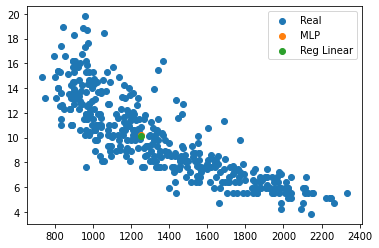

In [113]:
#Visualizamos a previsão graficamente
plt.scatter(X, Y, label='Real')
plt.scatter(X_futuro, y_rna_prev_futuro, label="MLP" )
plt.scatter(X_futuro, y_reglinear_prev_futuro, label="Reg Linear"
           )
plt.legend(loc=1)